# Final Python Assignment

Use the following table to provide us with

|name | student number|
|----|----|
|Linda Pelzer| 2003158|
|other group member's name| student number|

# Read this carefully

This is the final assignment for python. You also need to make the R part of this final assignment. 

With this python part of the final assignment, you can earn 4 points.

This assignment needs to be uploaded June 13 (23:59 at the latest). You cannot use this assignment for the resit!

After you have finished this exam, do the following:

* upload your python and R files to github
* create two links in your README file:

    * one link to "final python assignment"
    * one link to "final R assignment"

* fill in the google form (see link on Blackboard) that you have uploaded your files
* use the same student number you gave us before, otherwise we cannot retrieve your pass/fail grades


# Bargaining model

In the python lectures we considered a two period bargaining model. In the assignment of week 5, we extended this to a three period model.

In this final assignment we are going to extend the model to $n$ periods, where $n$ is a variable.

Although in the lectures and assignments we worked with plotly to make graphs, here we will use [matplotlib](https://matplotlib.org/). Hence, you need to google to see how plots are made using this library. An important aspect of using open source software is that you can figure out yourself how to use (new) things.


# Import libraries

First, we need to import some libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


**1)** [0.5 point] Use `np.arrange` to create a list of offers between 0.0 and 10.0 (including 10.0) with step 0.1:

In [2]:
min_offer = 0.0
max_offer = 10.0
step = 0.1
offers = np.arange(min_offer, max_offer+1, 0.1)

**2)** [0.5 point] Introduce the functions `accept_offer` and `make_offer` as in the lecture:

In [3]:
def accept_offer(offer,your_outside_option):
    accept = (offer >= your_outside_option)
    return accept

def make_offer(your_outside_option,other_outside_option):
    profits = [(max_offer-offer)*accept_offer(offer,other_outside_option) for offer in offers]
    max_profit = max(profits)
    max_index = profits.index(max_profit)
    if max_profit >= your_outside_option:
        your_offer = offers[max_index]
        your_profit = max_offer-offers[max_index]
        other_profit = offers[max_index]
    else:
        your_offer = -1 # no offer is made
        your_profit = your_outside_option
        other_profit = other_outside_option
    return your_offer, your_profit, other_profit

**3)** [0.5 point] Initialize a dictionary `offer` as in the assignment of week 5:

In [4]:
delta = 0.9
offer = {}

**4)** [0.5 point] Complete the following function such that it returns the payoffs to players 1 and 2 for a game of length $n$ periods when the discount factor is given by $\delta$:

In [5]:
def outcome(n,delta):
    offer[n+1]=[0,0,0]
    for i in range(n):
        offer[n-i]= make_offer(delta*offer[n-i+1][2],delta*offer[n-i+1][1]) 
    return offer[n-i]

**5)** [0.5 point] Check the outcomes for the case where $\delta = 0.9$, $n=1, 2$ and $n=3$ (these are outcomes that you have seen before).

In [7]:
delta = 0.9
offer = {}
outcome(1,0.9)

(0.0, 10.0, 0.0)

In [8]:
outcome(2,0.9)

(9.0, 1.0, 9.0)

In [9]:
outcome(3,0.9)

(0.90000000000000002, 9.0999999999999996, 0.90000000000000002)

**6)** [1 point] *Using matplotlib* plot for the case with $\delta =0.9$, the payoff for player 1 of a game that lasts for 1 round, a game that lasts for 2 rounds, up till a game that lasts 30 rounds. On the horizontal axis, we have the length of the game $n$; on the vertical axis the payoff to player 1.

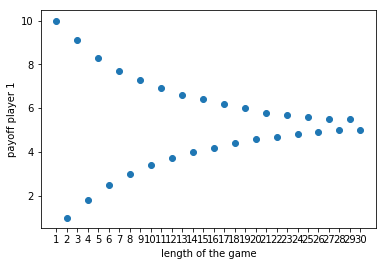

In [13]:
n=30
delta = 0.9
range_n = np.arange(1,n+1,1)
payoff = [outcome(i,delta)[1] for i in range_n]
plt.scatter(range_n,payoff)
plt.ylabel('payoff player 1')
plt.xlabel('length of the game')
plt.xticks(range_n)
plt.show()


**7)** [0.5 point] What pattern do you see in the graph? What is the intuition/explanation for this? [hint: if you cannot plot the outcome with matplotlib, you can still answer this question; e.g. simply by looking at the outcomes for different values of $n$]

In the first round player 1 makes an offer to player 2. Most players  will begin with a low offer in order to get a higher payoff themselves. Player 2 can reject this offer and than the game goes on. In the second round player 2 can make an offer to player 1 and player 1 can reject this offer also if the game will continue. In the third round it is players 1 turn and in the fourth round players 2 turn again, if rejected. This will go on untill the players will reach an agreement. As the game lasts longer, there are more opportunities to earn a higher payoff. Players are namely more tend to reject the offer made by the other, because they know the offer of the other will be higher in the next round (to make sure it is not rejected again) and will not settle with a payoff lower than the others' payoff. Every next round there will be more offered and less earned by the offerer and eventually the players will stop rejecting by a payoff of 5. At this payoff they know they can't get any better offer, because they have at 5 the same payoff as the other and they know the other will never going to offer more than what their payoff is as a result of this offer. 